# Baltimore Stream Water Quality Analysis

As someone who cares about public health and environmental issues, I wanted to explore the quality of water in Baltimore's streams. This analysis examines water quality data from 1995-2020 to understand contamination levels and trends over time.

**Key Questions:**
- How prevalent is coliform bacteria in Baltimore's streams?
- What are the lead contamination levels across different stations?
- Are dissolved oxygen levels healthy for aquatic life?
- How have these metrics changed over time?

**Dataset:** Surface Water Quality Data from [Baltimore Open Data](https://data.baltimorecity.gov/)  
**Tools:** Python, pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Cleaning the Data

In [2]:
df = pd.read_csv("Stream_Impact_Sampling_and_Ammonia_Screening.csv")
df.head(10)

,OBJECTID,date,time,station,parameter,result,unit,stationLocation,Zip_Codes,GlobalID
0,1,10/30/2017,12:17,NORTH AVE.,pH,7.81,pH units,"(39.31079, -76.61989)",13642.0,4b3306f7-64f7-407d-b408-d3979107c583
1,2,7/2/2019,10:09,POWDER MILL,TKN,0.40,mg/L,"(39.3359, -76.71046)",13995.0,51048520-3639-4819-85eb-9fbee7e4002d
2,3,10/3/2017,10:00,POWDER MILL,Hardness,322.00,mg/L,"(39.3359, -76.71046)",13995.0,493b6cfa-6007-4bc0-8b1e-15c77eeae390
3,4,7/2/2019,12:30,JANEY RUN,pH,7.50,pH units,"(39.26137, -76.55798)",27935.0,b4fae653-95db-4c9a-b5d1-7961bb2affe3
4,5,11/14/2017,11:40,JF 11.5,TKN,0.70,mg/L,"(39.313099, -76.622608)",14006.0,b64884d5-3fe4-4b46-ac24-b579e9f207e4
5,6,7/25/2019,10:11,LIGHT ST.,Turbidity,3.21,ntu,"(39.28343, -76.61182)",13645.0,ad5d6683-2832-4085-9a57-acfda0b643a4
6,7,10/3/2017,11:16,DEAD RUN DNST.,Sodium,58.00,mg/L,"(39.30509, -76.68639)",27950.0,40220c22-cef8-4908-98b7-4d6a88c35d7c
7,8,7/29/2019,8:00,CYLBURN,pH,8.12,pH units,"(39.357373, -76.654371)",14001.0,4013c0f9-6b6c-46dc-a49f-30ee05818c33
8,9,7/29/2019,10:18,JANEY RUN,Chlorine_Spec,0.05,mg/L,"(39.26137, -76.55798)",27935.0,fe37a649-985f-42ea-8e9f-6173c8b9b81a
9,10,7/30/2019,8:40,CR @ THE ALAMEDA,Turbidity,4.28,ntu,"(39.35655, -76.59576)",28564.0,d96d792f-a9f2-4643-80f3-99db3c1a1851


In [3]:
# Drop unnecessary ID columns
df.drop(columns=["OBJECTID", "GlobalID"], axis=1, inplace=True)
df.head()

,date,time,station,parameter,result,unit,stationLocation,Zip_Codes
0,10/30/2017,12:17,NORTH AVE.,pH,7.81,pH units,"(39.31079, -76.61989)",13642.0
1,7/2/2019,10:09,POWDER MILL,TKN,0.40,mg/L,"(39.3359, -76.71046)",13995.0
2,10/3/2017,10:00,POWDER MILL,Hardness,322.00,mg/L,"(39.3359, -76.71046)",13995.0
3,7/2/2019,12:30,JANEY RUN,pH,7.50,pH units,"(39.26137, -76.55798)",27935.0
4,11/14/2017,11:40,JF 11.5,TKN,0.70,mg/L,"(39.313099, -76.622608)",14006.0


### Handling Missing Values

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348636 entries, 0 to 377867
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             348636 non-null  object 
 1   time             347935 non-null  object 
 2   station          348636 non-null  object 
 3   parameter        348636 non-null  object 
 4   result           348636 non-null  float64
 5   unit             347741 non-null  object 
 6   stationLocation  348549 non-null  object 
 7   Zip_Codes        348549 non-null  float64
 8   year             348636 non-null  int64  
 9   level            34814 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 29.3+ MB


In [5]:
# Check null values per column
df.isnull().sum()

date                   0
time                 733
station                0
parameter              0
result             29232
unit                1164
stationLocation      106
Zip_Codes            106
dtype: int64

In [6]:
# Remove rows with missing result values - these are essential for analysis
df.dropna(subset=["result"], inplace=True)

### Creating Year Column for Time-Based Analysis

In [7]:
df["year"] = df["date"].apply(lambda x: int(x.split("/")[2]))
df.head()

,date,time,station,parameter,result,unit,stationLocation,Zip_Codes,year
0,10/30/2017,12:17,NORTH AVE.,pH,7.81,pH units,"(39.31079, -76.61989)",13642.0,2017
1,7/2/2019,10:09,POWDER MILL,TKN,0.40,mg/L,"(39.3359, -76.71046)",13995.0,2019
2,10/3/2017,10:00,POWDER MILL,Hardness,322.00,mg/L,"(39.3359, -76.71046)",13995.0,2017
3,7/2/2019,12:30,JANEY RUN,pH,7.50,pH units,"(39.26137, -76.55798)",27935.0,2019
4,11/14/2017,11:40,JF 11.5,TKN,0.70,mg/L,"(39.313099, -76.622608)",14006.0,2017


In [8]:
# Check what years are represented
df["year"].value_counts().sort_index()

year
1995      671
1996     1004
1997     4615
1998     6598
1999     7519
2000    10661
2001    12693
2002    13207
2003    15773
2004    18560
2005    17120
2006    14349
2007    14860
2008    15626
2009    15096
2010    12326
2011    14176
2012    14945
2013    15261
2014    10451
2015    14436
2016    18114
2017    21321
2018    23451
2019    24482
2020    11321
Name: count, dtype: int64

## Coliform Bacteria Analysis

There is no safe amount of coliform bacteria in drinking water. Coliform presence indicates potential fecal contamination and health risks. Let's examine how prevalent it is in Baltimore's streams.

In [9]:
# Filter for positive coliform readings (any type of coliform)
coliform_detected = df[(df["parameter"].str.contains("Coliform")) & (df["result"] > 0)]

In [10]:
# Which stations have had positive coliform readings?
coliform_detected["station"].value_counts()

station
RADECKE AVE.             291
HAMILTON AVE.            288
MARY AVE.                281
WRIGHT AVE.              258
BIDDLE ST. & 62ND ST.    257
MT. PLEASANT GC          256
WASHINGTON BLVD.         255
PERRING PKWY             254
PURNELL DR.              254
HARFORD RD.              254
PULASKI HWY.             254
WESTERN RUN              252
MAIDENS CHOICE           251
SMITH AVE.               250
TIFFANY RUN              250
STONY RUN                248
DEAD RUN DNST.           248
LOMBARD ST.              247
GWYNNS FALLS PKWY.       243
GRUN HILTON ST.          242
POWDER MILL              241
GF HILTON ST.            237
CHINQUAPIN RUN           234
GRUN CARROLL PARK        234
BRANCH AVE.              206
WATERVIEW AVE.           197
JANEY RUN                196
LIGHT ST.                195
REEDBIRD AVE.            193
CENTRAL & LANCASTER      192
LAKEWOOD AVE.            192
WARNER & ALLUVION        191
NORTH AVE.               180
NEWKIRK AVE.              93
CHILDS

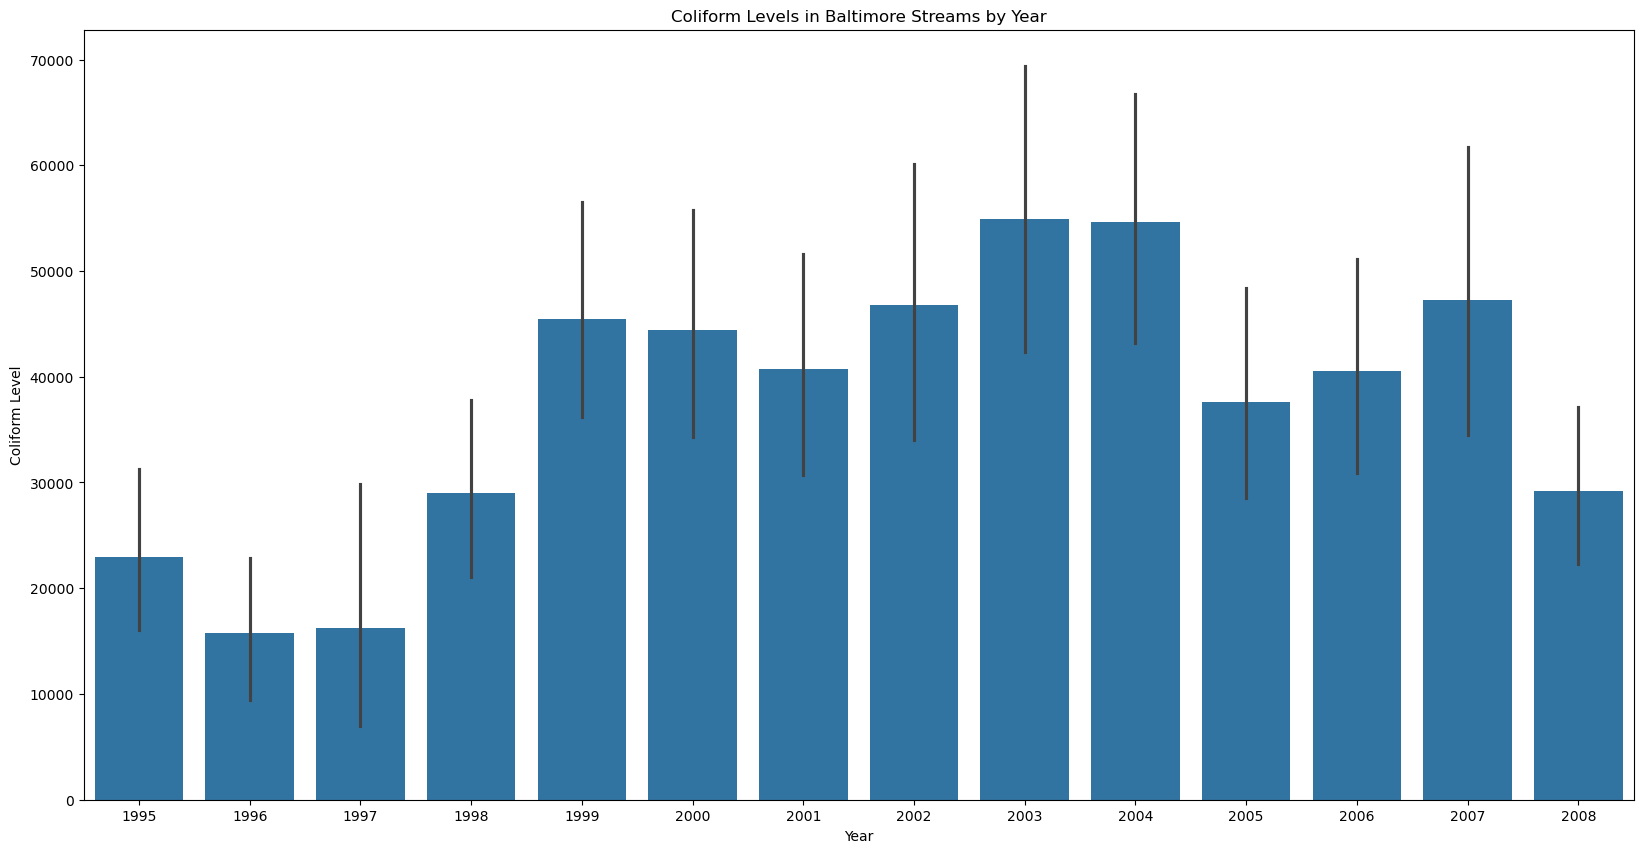

In [11]:
# Visualize coliform levels over time
plt.figure(figsize=(20, 10))
sns.barplot(x=coliform_detected["year"], y=coliform_detected["result"])
plt.title("Coliform Levels in Baltimore Streams by Year")
plt.xlabel("Year")
plt.ylabel("Coliform Level")
plt.show()

**Observation:** While the historical coliform levels were concerning, the graph shows that levels dropped significantly after 2008. RADECKE AVE, HAMILTON AVE, and MARY AVE were the top areas with high coliform readings historically.

## Lead Level Analysis

Lead is extremely dangerous - there is no safe level of lead exposure. It can cause physical and mental health issues. Let's investigate lead levels across Baltimore's water stations.

In [12]:
# View lead measurements
df[df["parameter"].str.contains("Lead")].head(10)

,date,time,station,parameter,result,unit,stationLocation,Zip_Codes,year
346,7/24/2019,10:45,HAMILTON AVE.,"Lead, Total",2.80,ug/L,"(39.33673, -76.53967)",13991.0,2019
4967,9/24/2019,9:51,HAMILTON AVE.,"Lead, Total",2.40,ug/L,"(39.33673, -76.53967)",13991.0,2019
12591,1/28/2020,12:08,HAMILTON AVE.,"Lead, Total",2.20,ug/L,"(39.33673, -76.53967)",13991.0,2020
22671,8/27/2012,10:50,MARY AVE.,"Lead, Total",1.30,ug/L,"(39.343655, -76.541122)",13991.0,2012
22674,10/16/2001,10:00,GRUN HILTON ST.,"Lead, Total",1.19,ug/L,"(39.3027, -76.67416)",27297.0,2001
28625,6/25/2019,12:31,HAMILTON AVE.,"Lead, Total",4.20,ug/L,"(39.33673, -76.53967)",13991.0,2019
34475,2/26/2019,11:07,HAMILTON AVE.,"Lead, Total",2.20,ug/L,"(39.33673, -76.53967)",13991.0,2019
44225,1/29/2019,11:29,RADECKE AVE.,"Lead, Total",2.20,ug/L,"(39.33036, -76.53478)",13991.0,2019
50816,1/24/2018,10:49,HAMILTON AVE.,"Lead, Total",7.70,ug/L,"(39.33673, -76.53967)",13991.0,2018
53341,12/18/2007,11:16,MARY AVE.,"Lead, Dissolved",0.47,ug/L,"(39.343655, -76.541122)",13991.0,2007


In [13]:
# Categorize lead levels as 'fine' or 'high'
has_lead = df["parameter"].str.contains("Lead")
df.loc[has_lead, "level"] = (df.loc[has_lead, "result"] > 0).map({True: "high", False: "fine"})

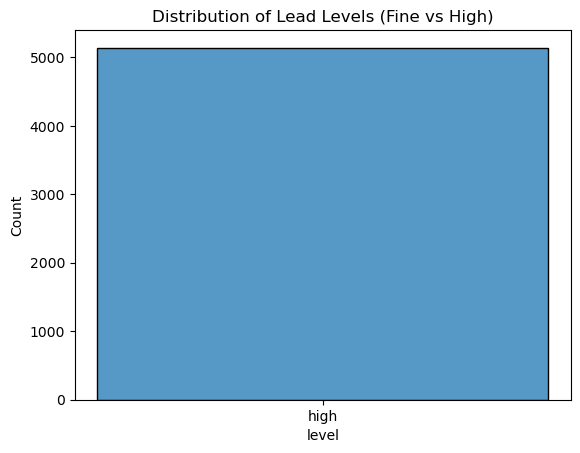

In [14]:
# Histogram of lead levels
lead_data = df[df["parameter"].str.contains("Lead")]
sns.histplot(data=lead_data, x="level")
plt.title("Distribution of Lead Levels (Fine vs High)")
plt.show()

In [15]:
# Lead statistics by station
df[df["parameter"].str.contains("Lead")].groupby("station")["result"].agg(["mean", "min", "max"])

,mean,min,max
station,,,
ASH ST.,2.780000,1.00,8.00
BIDDLE ST. & 62ND ST.,2.629456,0.05,47.00
BRANCH AVE.,15.301447,0.07,100.00
CENTRAL & LANCASTER,4.611299,0.05,34.00
CHILDS ST.,5.575000,1.14,13.00
CHINQUAPIN RUN,1.278740,0.05,29.00
CURTIS & BIRCH,9.010000,9.00,9.02
DEAD RUN DNST.,1.294924,0.07,13.00
GF HILTON ST.,1.526800,0.05,19.60


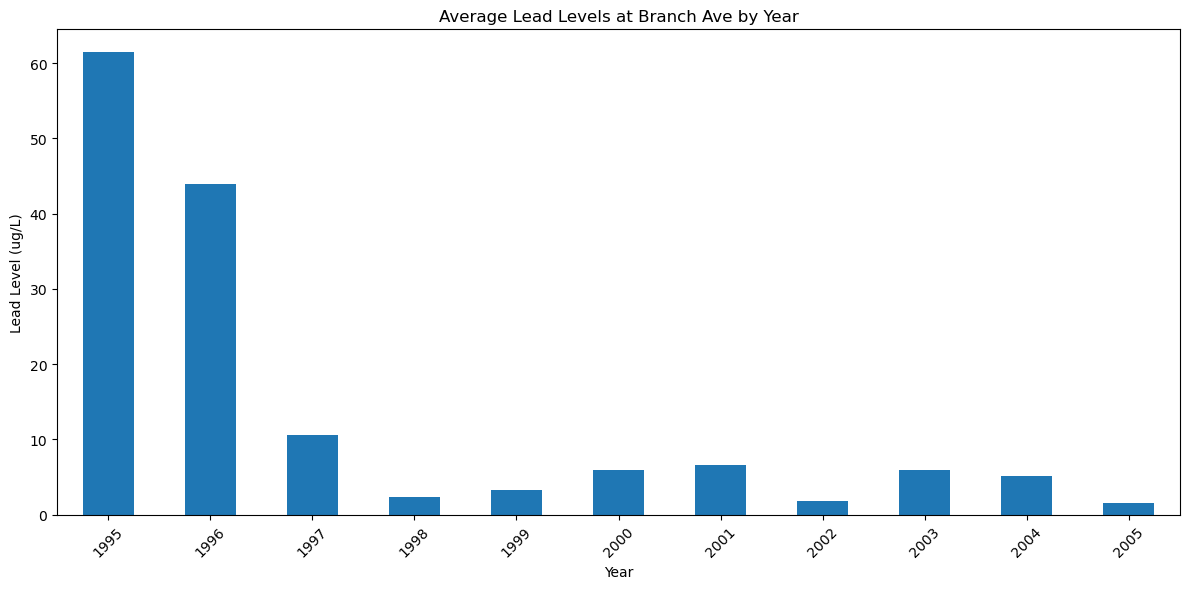

In [16]:
# Focus on the station with highest average lead: BRANCH AVE
branch_ave_lead = df[(df["parameter"].str.contains("Lead")) & (df["station"] == "BRANCH AVE.")]
branch_ave_yearly = branch_ave_lead.groupby("year")["result"].mean()

plt.figure(figsize=(12, 6))
branch_ave_yearly.plot(kind="bar")
plt.title("Average Lead Levels at Branch Ave by Year")
plt.xlabel("Year")
plt.ylabel("Lead Level (ug/L)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Dissolved Oxygen Analysis

Dissolved oxygen is crucial for aquatic life. Levels below 6.5 mg/L can stress fish and other organisms, while levels above 8 mg/L are considered healthy.

In [17]:
# Categorize dissolved oxygen levels
has_oxygen = df["parameter"].str.contains("Dissolved Oxygen")
df.loc[has_oxygen, "level"] = df.loc[has_oxygen, "result"].apply(
    lambda x: "low" if x < 6.5 else ("high" if x > 8 else "fine")
)
oxygen_data = df[has_oxygen]
oxygen_data.head()

,date,time,station,parameter,result,unit,stationLocation,Zip_Codes,year,level
23,2/28/2018,11:29,LIGHT ST.,Dissolved Oxygen,10.73,mg/L,"(39.28343, -76.61182)",13645.0,2018,high
26,7/10/2019,8:07,CR @ THE ALAMEDA,Dissolved Oxygen,8.16,mg/L,"(39.35655, -76.59576)",28564.0,2019,high
50,8/9/2019,8:20,NORTHHILL-ALAMEDA ALLEY MANHOLE,Dissolved Oxygen,8.56,mg/L,"(39.339328, -76.600969)",27307.0,2019,high
58,7/26/2019,9:24,"WOODBOURNE & PIONEER OUTFALL 72""",Dissolved Oxygen,8.38,mg/L,"(39.355534, -76.573028)",27291.0,2019,high
59,8/13/2019,9:04,"FOREST PARK OUTFALL 84""",Dissolved Oxygen,8.64,mg/L,"(39.318649, -76.704194)",13995.0,2019,high


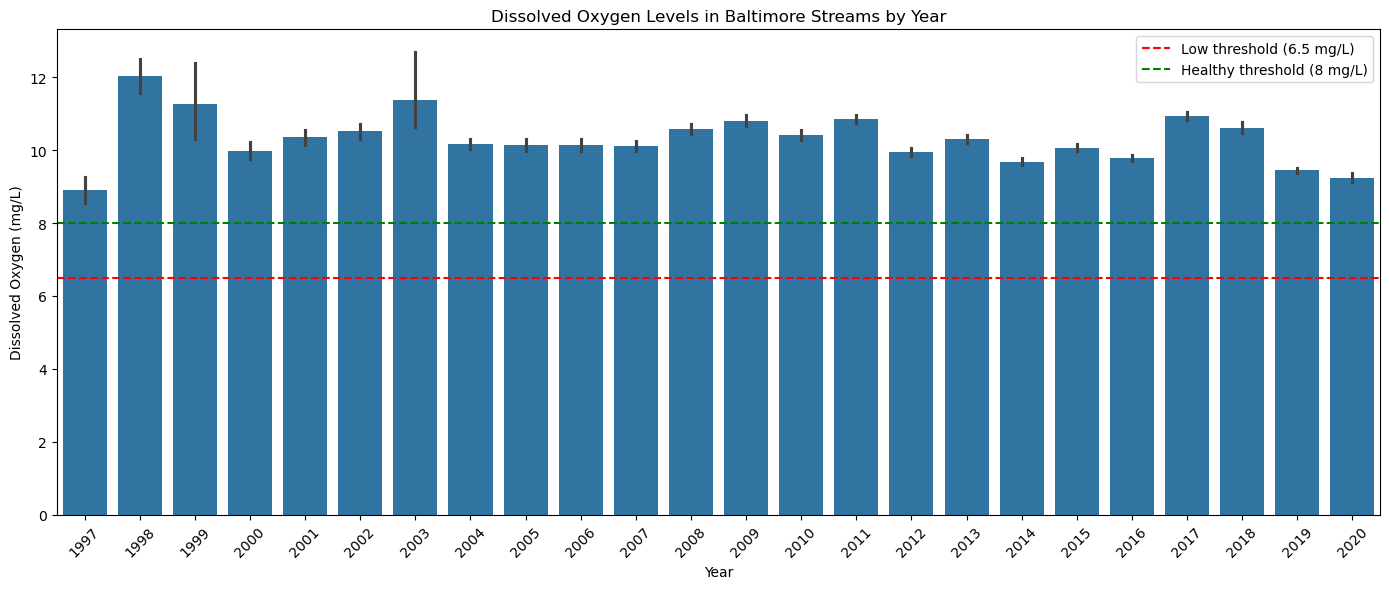

In [18]:
# Visualize dissolved oxygen levels over time
plt.figure(figsize=(14, 6))
sns.barplot(x=oxygen_data["year"], y=oxygen_data["result"])
plt.axhline(y=6.5, color="r", linestyle="--", label="Low threshold (6.5 mg/L)")
plt.axhline(y=8, color="g", linestyle="--", label="Healthy threshold (8 mg/L)")
plt.title("Dissolved Oxygen Levels in Baltimore Streams by Year")
plt.xlabel("Year")
plt.ylabel("Dissolved Oxygen (mg/L)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation Analysis

Let's examine how different water quality parameters correlate with each other.

In [19]:
# Pivot data for correlation analysis
correlation_df = df.pivot_table(index=["date", "station", "year"], columns="parameter", values="result").reset_index()

In [20]:
# Correlation matrix for key parameters in 2019
key_params = ["Dissolved Oxygen", "Fecal Coliform", "Total Coliform", "Lead, Total", "Lead, Dissolved"]
data_2019 = correlation_df[correlation_df["year"] == 2019]
data_2019[key_params].corr()

parameter,Dissolved Oxygen,Fecal Coliform,Total Coliform,"Lead, Total","Lead, Dissolved"
parameter,,,,,
Dissolved Oxygen,1.0,NaN,NaN,NaN,NaN
Fecal Coliform,NaN,NaN,NaN,NaN,NaN
Total Coliform,NaN,NaN,NaN,NaN,NaN
"Lead, Total",NaN,NaN,NaN,1.0,NaN
"Lead, Dissolved",NaN,NaN,NaN,NaN,NaN


In [21]:
# Number of samples in 2019
print(f"Number of samples in 2019: {len(data_2019)}")
correlation_df["year"].value_counts()

Number of samples in 2019: 3702


year
2018    3760
2019    3702
2017    3433
2016    2594
2020    2190
2013    2076
2015    2059
2007    1908
2012    1881
2008    1878
2005    1832
2006    1819
2004    1805
2011    1729
2009    1724
2014    1487
2003    1452
2010    1412
2001    1127
2002    1098
1999    1067
2000     913
1998     554
1997     286
1996      95
1995      79
Name: count, dtype: int64

## Conclusions

This analysis of Baltimore's stream water quality data from 1995-2020 revealed several important findings:

**Coliform Bacteria:**
- Historical coliform levels were concerning, but showed significant improvement after 2008
- RADECKE AVE, HAMILTON AVE, and MARY AVE had the highest historical contamination

**Lead Contamination:**
- Lead is present in many stations throughout the city
- BRANCH AVE showed the highest average lead levels
- Any lead presence is concerning given there is no safe exposure level

**Dissolved Oxygen:**
- Most readings fall within healthy ranges for aquatic life
- Consistent monitoring helps identify stations that may need intervention

**Correlation Analysis:**
- The correlation between different water quality measurements helps validate data consistency
- Related contaminants tend to occur together, which can help identify pollution sources

This type of environmental data analysis is crucial for public health decisions and infrastructure planning in urban areas.